In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Business Problem
A online retail company has made sales during diwali season last year which they want to be analysed and predict the trends and insight for this year so they can make warehousing easy and to reach  their business target this year too.

#### Areas of analysis
1. Which type of customer tend to order more during diwali season.
2. which type of customer give high revenue to company.
3. which states are more prone to high orders.
4. which states are more prone to high Revenue.
5. which product categories generate more revenue.
6. Professional Background of frequent customers.
7. Which states are more prone to particular product items.


In [2]:
df=pd.read_csv('Diwali Sales Data.csv',encoding = 'unicode_escape')
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


## 1. Exploring the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
df.shape

(11251, 15)

In [5]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

## 2. Data Cleaning and Pre-Processing

In [6]:
# Dropping Age Group, status and unnamed1 colunmms
df.drop(columns = ['Age','Status','unnamed1'],axis=1,inplace=True)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [8]:
# Treating the null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# dropping null columns
df.dropna(axis=0,inplace=True)

In [10]:
df.shape

(11239, 12)

In [11]:
df.columns = df.columns.str.lower()

In [12]:
df['state'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

In [13]:
df['state'].replace({"Andhra\xa0Pradesh":"AP",'Uttar Pradesh':"UP",'Uttarakhand':"UK",'Haryana':"HR",'Karnataka':'KR','Gujarat':"GJ"
                    ,'Delhi':'DL',"Jharkhand":'JH','Kerala':'KR','Madhya Pradesh':'MP',"Bihar":'BH','Rajasthan':'RAJ',
                     'Telangana':"TL",'Punjab':'PB','Maharashtra':'MH','Himachal Pradesh':'HP'},inplace=True)

In [14]:
df.head()

,user_id,cust_name,product_id,gender,age group,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,0,MH,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,1,AP,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,1,UP,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,0,KR,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,1,GJ,Western,Food Processing,Auto,2,23877.0


## 3. Data Visualization

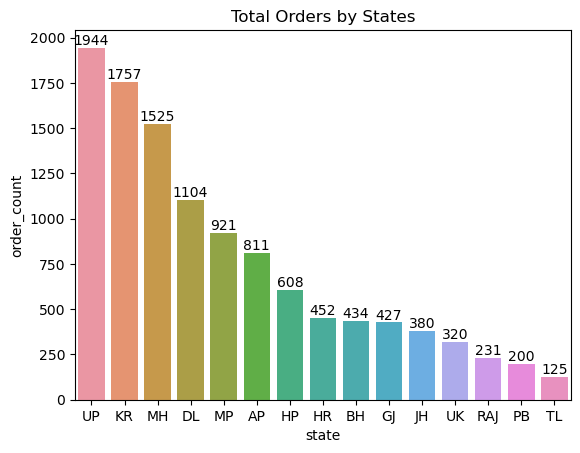

In [15]:
# state vs orders
df_state = df.groupby("state").size().reset_index().rename(columns={0:'order_count'}).sort_values(by="order_count",ascending=False)
x= sns.barplot(x=df_state['state'],y=df_state['order_count'])
for bars in x.containers:
    x.bar_label(bars)
plt.title("Total Orders by States")
plt.show()

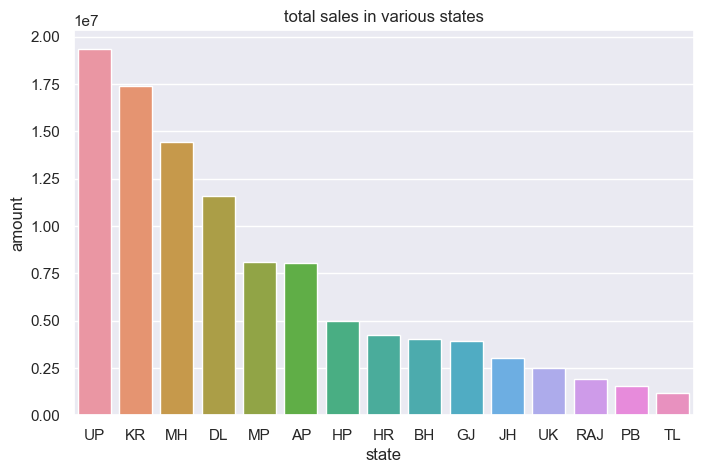

In [16]:
sales_by_states = df.groupby(["state"],as_index=False)["amount"].sum().sort_values(by='amount',ascending=False)
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x='state',y='amount',data=sales_by_states)
plt.title("total sales in various states")
plt.show()

#### By these visualizations we conclude that the most orders and revenue generating states are UP, Karnataka and Maharastra

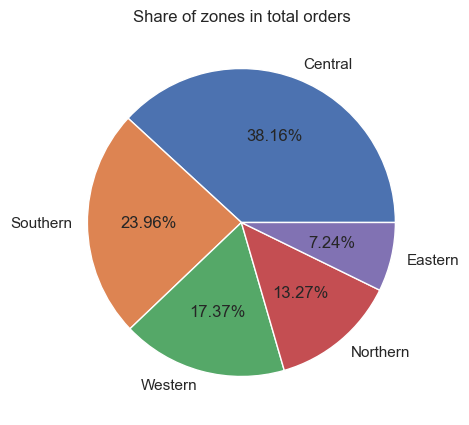

In [17]:
# orders Vs Zone
df_zone= df.groupby("zone").size().reset_index().rename(columns={0:'order_count'}).sort_values(by="order_count",ascending=False)
palette_color = sns.color_palette('deep') 
plt.pie(df_zone['order_count'],labels=df_zone['zone'],colors= palette_color,autopct="%1.2f%%")
plt.title("Share of zones in total orders")
plt.show()

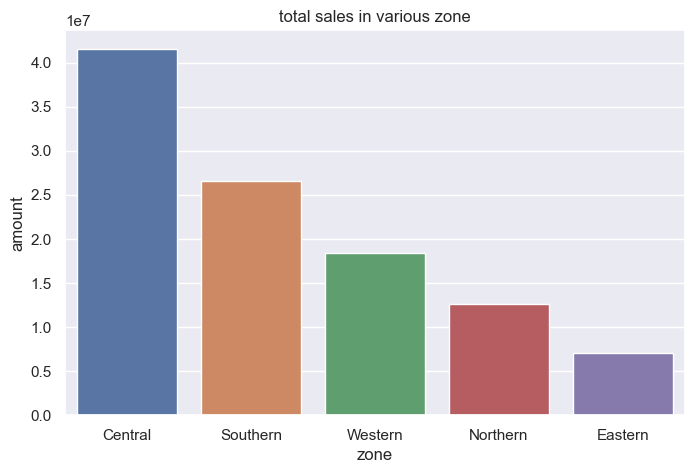

In [18]:
sales_by_zone = df.groupby(["zone"],as_index=False)["amount"].sum().sort_values(by='amount',ascending=False)
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x='zone',y='amount',data=sales_by_zone)
plt.title("total sales in various zone")
plt.show()

#### By these visualizations we conclude that most customers are from central and southern zones

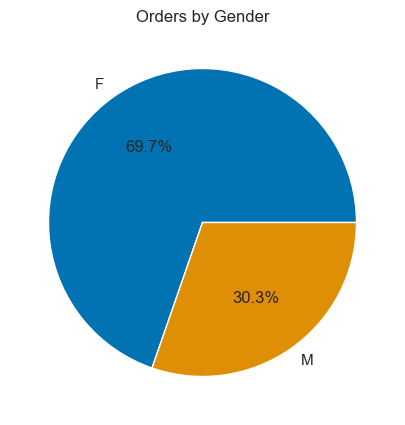

In [19]:
# state vs Amount
gender_df = df.groupby('gender').size().reset_index().rename(columns={0:"total_orders"})
palette_color = sns.color_palette('colorblind') 
plt.pie(gender_df['total_orders'],labels=gender_df["gender"],colors= palette_color, autopct="%1.1f%%")
plt.title("Orders by Gender")
plt.show()

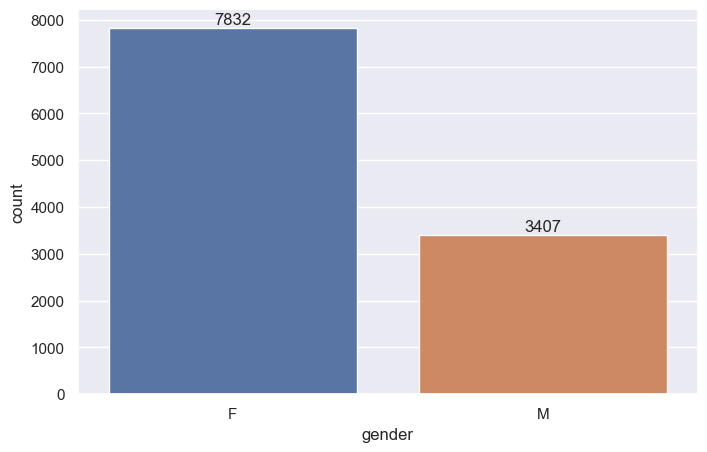

In [20]:
count= sns.countplot(x="gender",data=df)
for bars in count.containers:
    count.bar_label(bars)

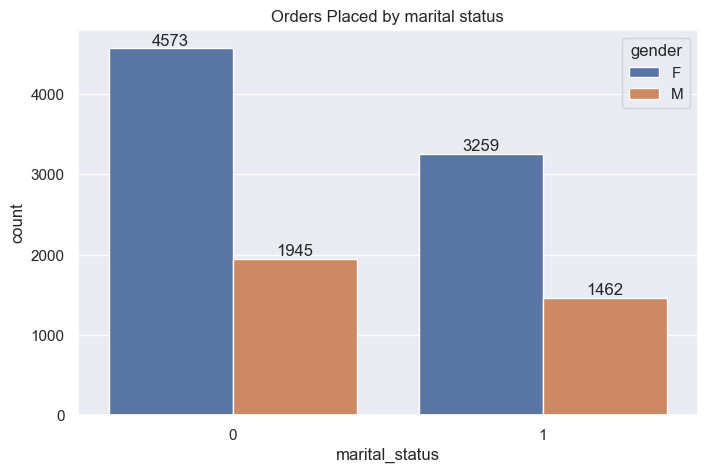

In [21]:
x= sns.countplot(x="marital_status", hue='gender',data=df)
sns.set(rc={'figure.figsize':(8,5)})
for bars in x.containers:
    x.bar_label(bars)
plt.title("Orders Placed by marital status")
plt.show()

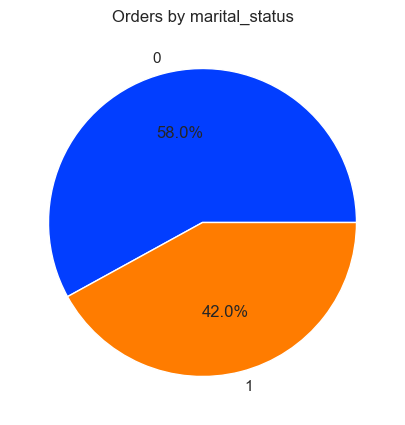

In [22]:
marital_status = df.groupby('marital_status').size().reset_index().rename(columns={0:"total_orders"})
palette_color = sns.color_palette('bright') 
plt.pie(marital_status['total_orders'],labels=marital_status["marital_status"],colors=palette_color,autopct="%1.1f%%")
plt.title("Orders by marital_status")
plt.show()

#### By these visualizations we conclude that  women are more buying more porducts specifically married women

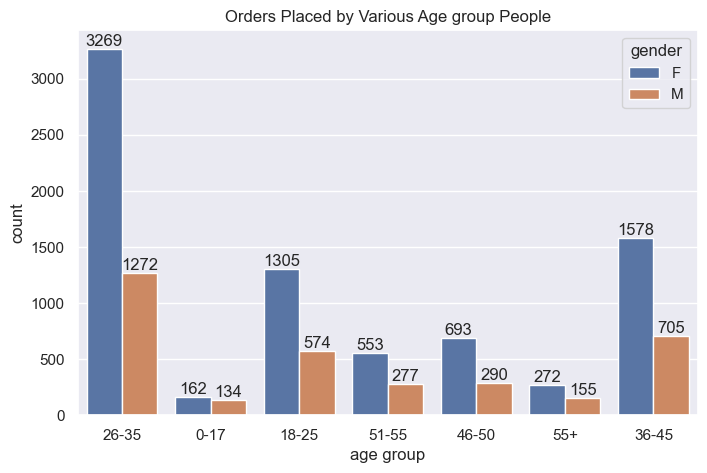

In [23]:
x= sns.countplot(x="age group", hue='gender',data=df)
sns.set(rc={'figure.figsize':(16,5)})
for bars in x.containers:
    x.bar_label(bars)
plt.title("Orders Placed by Various Age group People")
plt.show()

#### By these visualizations we conclude that female between 18-45 are the maximum revenue generating customers

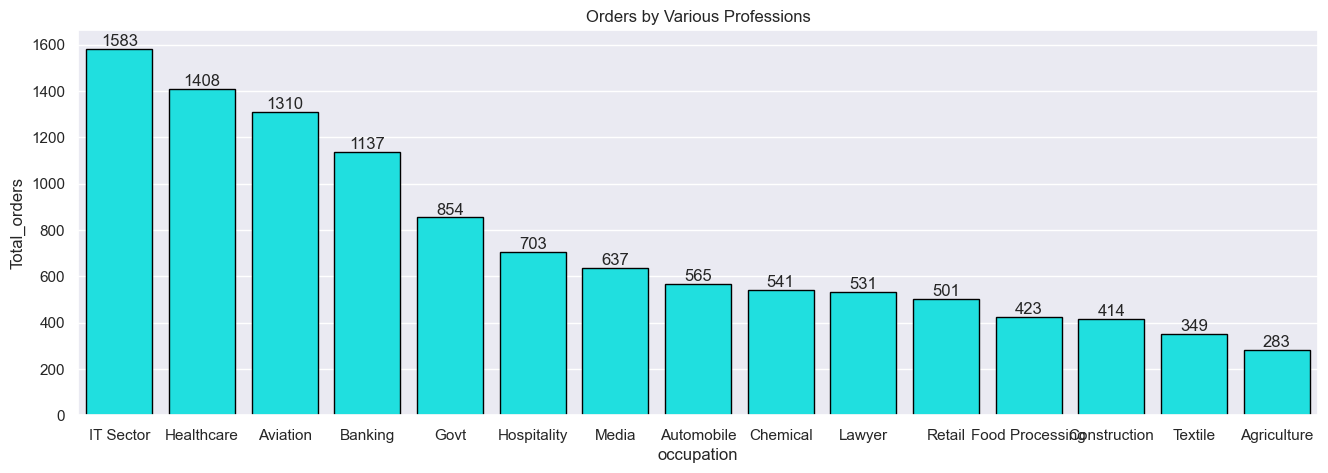

In [24]:
# Age Group vs Orders
occupation = df.groupby('occupation').size().reset_index().rename(columns={0:'Total_orders'}).sort_values("Total_orders",ascending=False)
sns.set(rc={'figure.figsize':(16,5)})
x = sns.barplot(x=occupation['occupation'],y=occupation['Total_orders'],color="cyan",edgecolor='black')
for bars in x.containers:
    x.bar_label(bars)
plt.title("Orders by Various Professions")
plt.show()

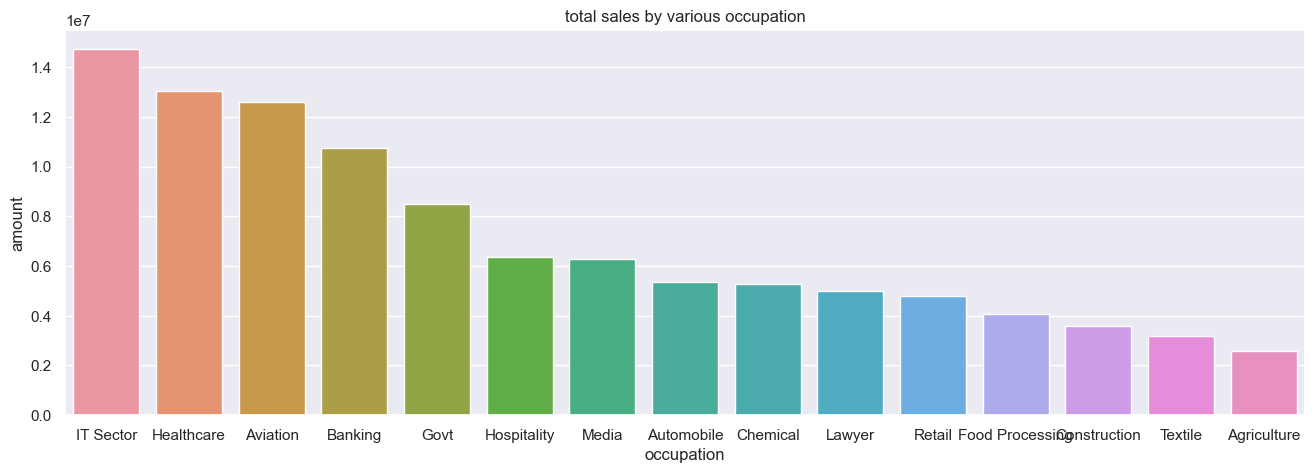

In [25]:
sales_by_occ = df.groupby(["occupation"],as_index=False)["amount"].sum().sort_values(by='amount',ascending=False)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='occupation',y='amount',data=sales_by_occ)
plt.title("total sales by various occupation")
plt.show()

#### By these visualizations we conclude that Professionals from IT, Healthcare, Aviation and banking sector are the top customer

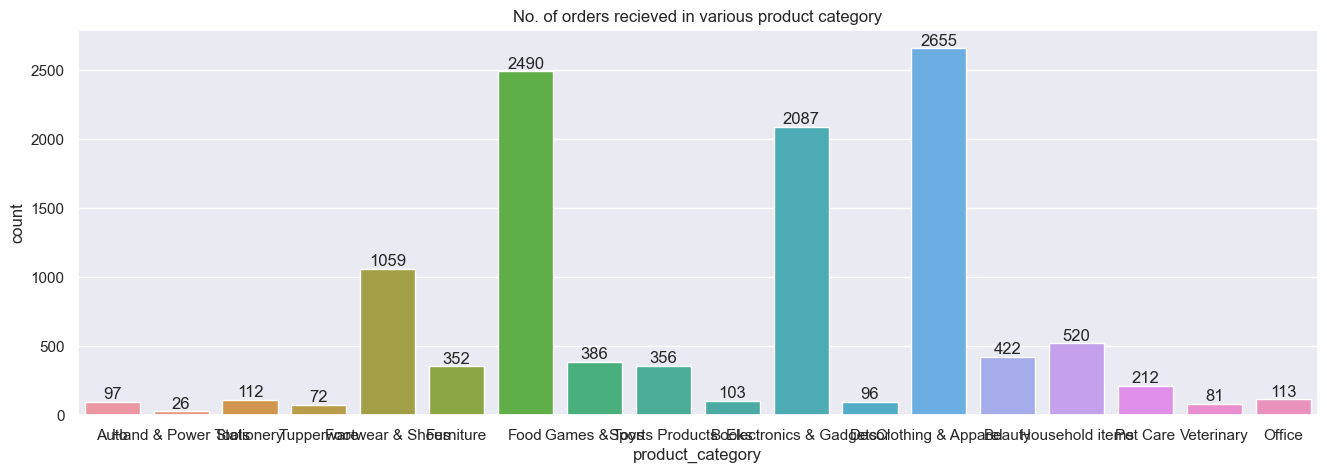

In [26]:
x= sns.countplot(x='product_category',data=df)
sns.set(rc={'figure.figsize':(22,8)})
for bars in x.containers:
    x.bar_label(bars)
plt.title('No. of orders recieved in various product category')
plt.show()

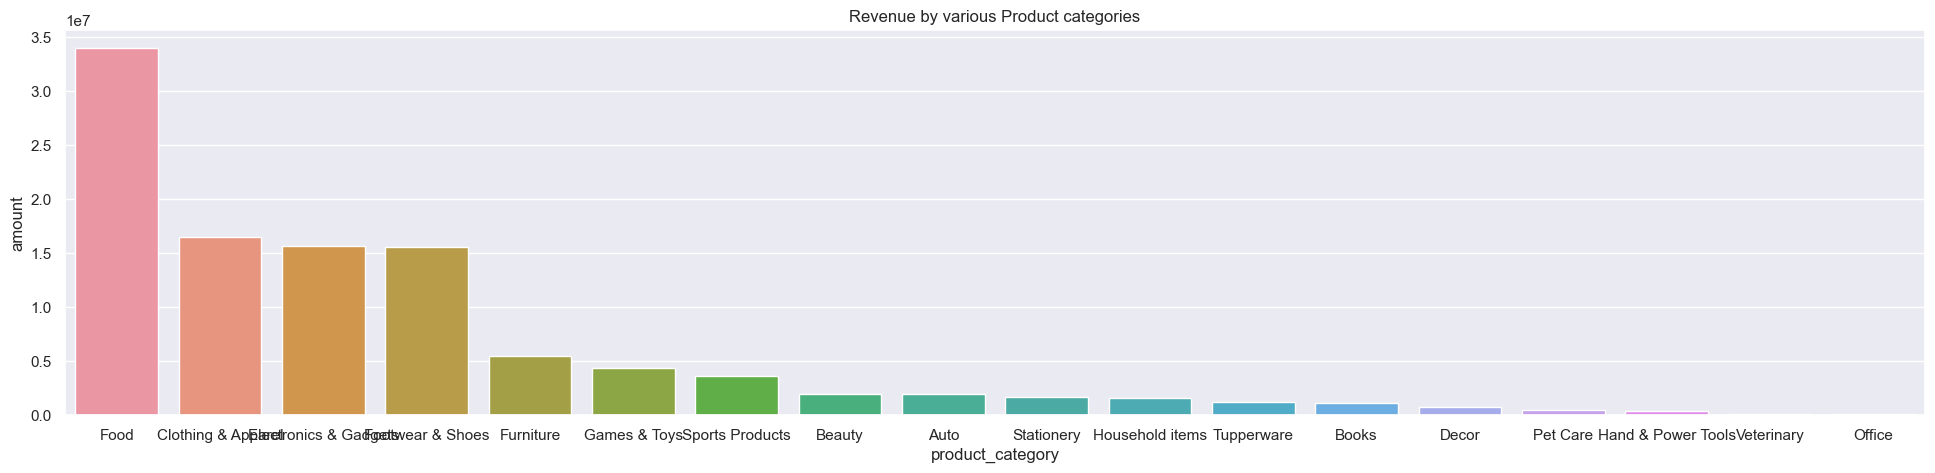

In [27]:
products_amount = df.groupby(["product_category"],as_index=False)['amount'].sum().sort_values(by='amount',ascending=False)
sns.set(rc={'figure.figsize':(24,5)})
sns.barplot(x='product_category',y='amount',data=products_amount)
plt.title("Revenue by various Product categories")
plt.show()

#### By these visualizations we conclude that food, clothing and electronics are top product categories 

In [28]:
states = df.groupby(['state','product_category']).size().reset_index()

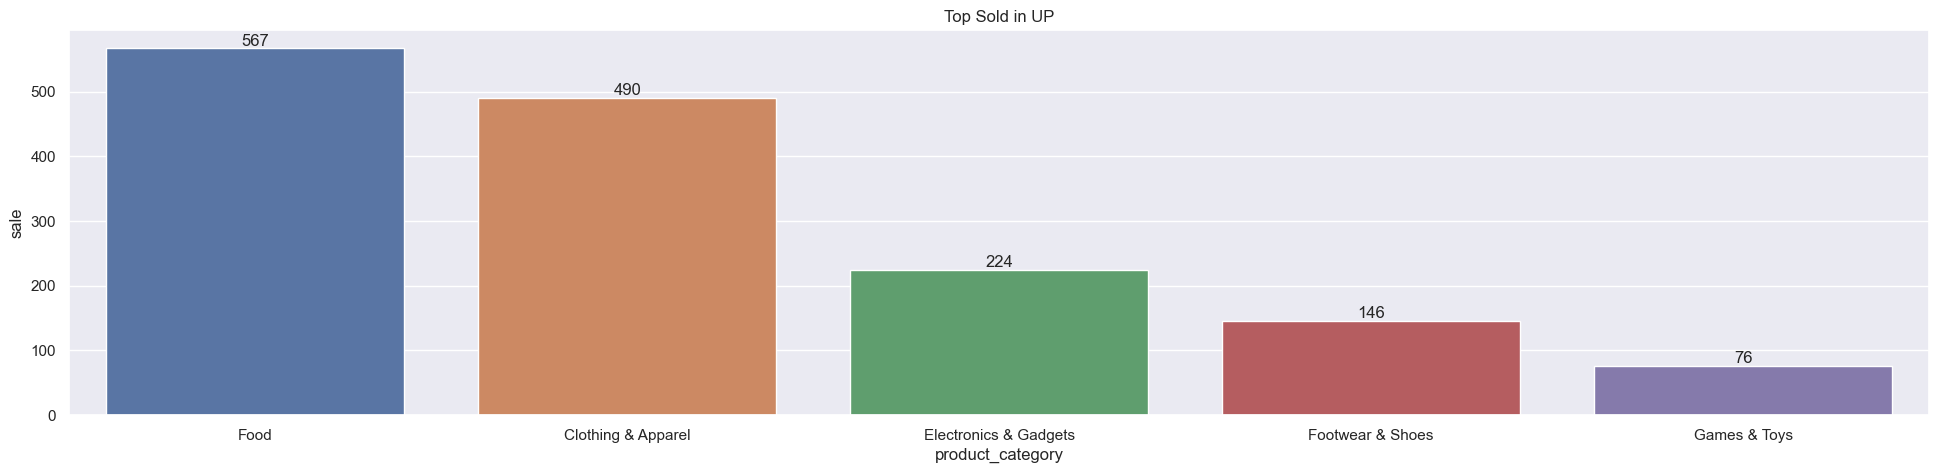

In [29]:
# so filtering this dataframe for UP,Karnataka and maharastra which have highest no of customers for the company
top_products_up = states[states['state'] =="UP"].rename(columns={0:'sale'}).sort_values(by="sale",ascending=False).head()
x = sns.barplot(x='product_category',y='sale',data=top_products_up)
for bars in x.containers:
    x.bar_label(bars)
plt.title("Top Sold in UP")
plt.show()

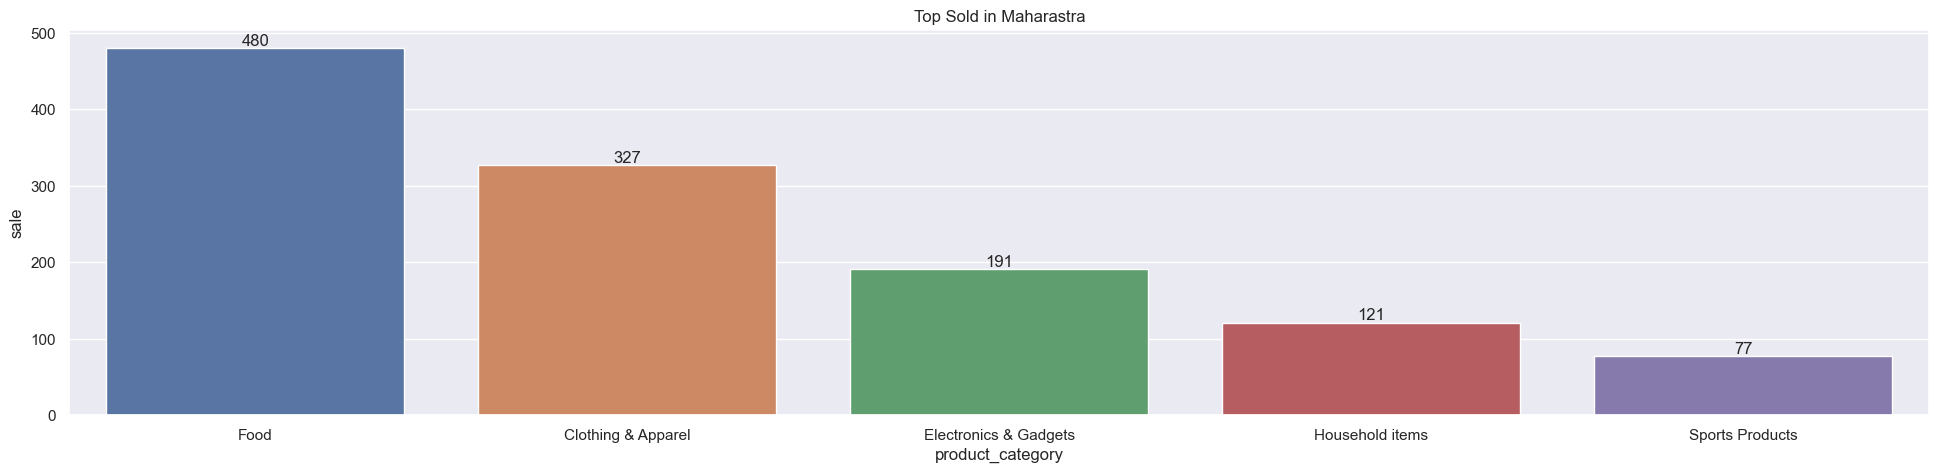

In [30]:
top_products_mh= states[states['state'] =="MH"].rename(columns={0:'sale'}).sort_values(by="sale",ascending=False).head()
x = sns.barplot(x='product_category',y='sale',data=top_products_mh)
for bars in x.containers:
    x.bar_label(bars)
plt.title("Top Sold in Maharastra")
plt.show()

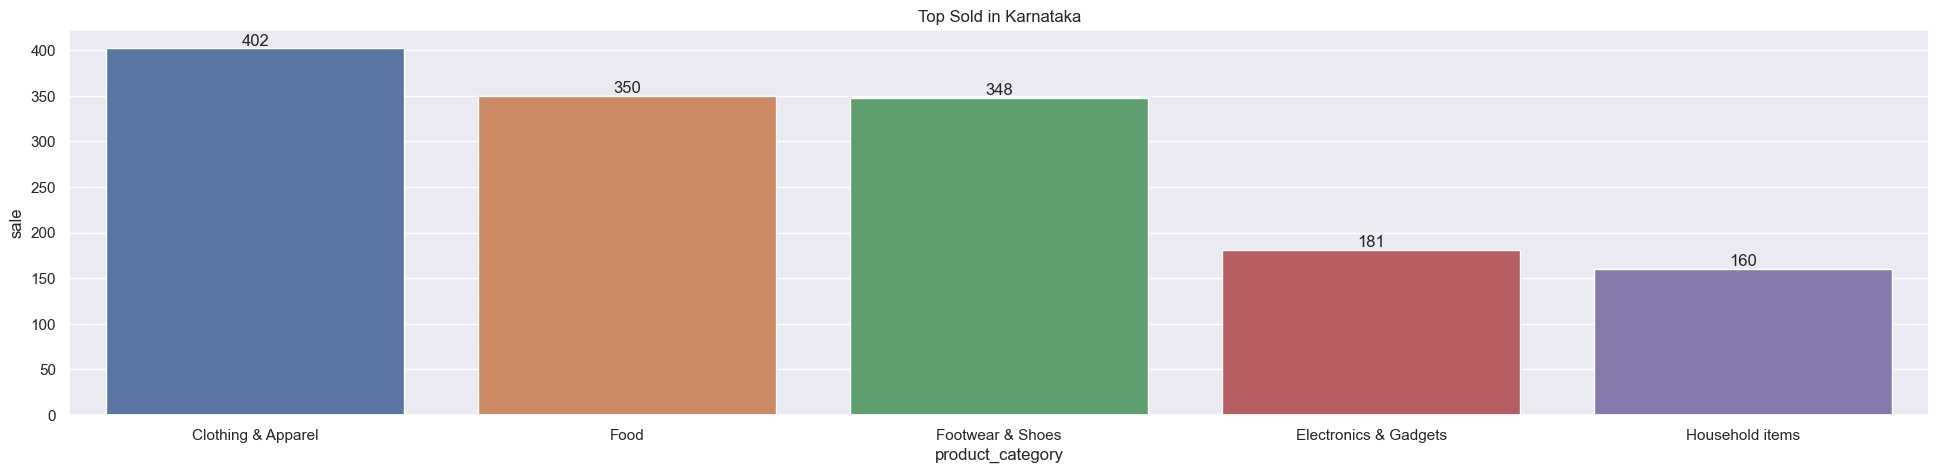

In [31]:
top_products_kr= states[states['state'] =="KR"].rename(columns={0:'sale'}).sort_values(by="sale",ascending=False).head()
x = sns.barplot(x='product_category',y='sale',data=top_products_kr)
for bars in x.containers:
    x.bar_label(bars)
plt.title("Top Sold in Karnataka")
plt.show()

#### By these visualizations we can see top 5 products sold in states are food, clothing, electronics etc.